In [30]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from typing import Dict, List

# Local imports
from ur_normalize import URDU_ALL_CHARACTERS_UNICODE as chars
# from phonemize_utils import phonemize_wordsZ
%matplotlib inline 

## Urdu

In [3]:
ur_nltk_df = pd.read_csv('outputs/ur/rand/words_50L_rnltk.csv', encoding = 'utf-8')
ur_spacy_df = pd.read_csv('outputs/ur/rand/words_50L_rspacy.csv', encoding = 'utf-8')
ur_indic_df = pd.read_csv('outputs/ur/rand/words_50L_rindic.csv', encoding = 'utf-8')
ur_stanza_df = pd.read_csv('outputs/ur/rand/words_50L_rstanza.csv', encoding='utf-8')

In [4]:
print(ur_nltk_df.shape[0], ur_spacy_df.shape[0], ur_indic_df.shape[0], ur_stanza_df.shape[0])

1014248 941393 921436 899325


In [5]:
def info_df(df: pd.DataFrame):
    # Ensure 'lengths' column is numeric
    df['lengths'] = pd.to_numeric(df['lengths'], errors='coerce')
    
    # Calculate statistics
    max_length = df['lengths'].max()
    min_length = df['lengths'].min()
    avg_length = df['lengths'].mean()
    
    # Sort DataFrame by 'lengths'
    df.sort_values('lengths', inplace=True, ascending=False)
    
    # Print results
    print(f'max length, average length, min length: {max_length}, {math.floor(avg_length)}, {min_length}')

print('nltk')
info_df(ur_nltk_df)

print('indic')
info_df(ur_indic_df)

print('spacy')
info_df(ur_spacy_df)

print('stanza')
info_df(ur_stanza_df)


nltk
max length, average length, min length: 323, 7, 1
indic
max length, average length, min length: 323, 7, 1
spacy
max length, average length, min length: 323, 7, 1
stanza
max length, average length, min length: 250, 7, 1


In [6]:
def construct_freq_dicts(df: pd.DataFrame, limit: int) -> Dict[int, int]:
    fd = {}
    less_than = df[df['lengths'] <= limit]
    more_than = df[df['lengths'] > limit]
    sum: int = 0

    for l in less_than['lengths'].unique():
        values = less_than[less_than['lengths'] == l]
        fd.update({l: values.shape[0]})

    for l in more_than['lengths'].unique():
        values = more_than[more_than['lengths'] == l]
        sum = sum + values.shape[0]
    
    fd.update({limit+1: sum})

    return fd

def normalize_freq_dict(fd: Dict[int, int], df_size: int) -> Dict[int, float]:
    norm_dict: Dict[int, float] = {}
    for key, value in fd.items():
        norm_dict.update({key: value / df_size})
    return norm_dict

In [7]:
# Assessing tokenization quality by checking number of untokenized chunks

def get_sequences(df: pd.DataFrame):
    sentences = df[df['lengths'] > 100]
    untokenized_words = df[df['lengths'].between(11, 100, inclusive='both')]
    words = df[df['lengths'].between(1, 10, inclusive='both')]

    print(f'Number of sentences, urdu tokens, urdu words are: {sentences.shape[0], untokenized_words.shape[0], words.shape[0]}')

    non_urdu_s = []
    for sentence in sentences['Word']:
        for word in sentences:
            if check_urdu_word(word) == False:
                non_urdu_s.append(sentence)

    non_urdu_t = []
    for token in untokenized_words['Word']:
        if check_urdu_word(token) == False:
            non_urdu_t.append(token)

    non_urdu_w = []
    for w in words['Word']:
        if check_urdu_word(w) == False:
            non_urdu_w.append(w)

    non_urdu_t = set(non_urdu_t)
    non_urdu_s = set(non_urdu_s)
    non_urdu_w = set(non_urdu_w)

    # Results: Only the sentences have non-urdu words
    print(f'Number of non urdu sentences, tokens, words: {len(non_urdu_s), len(non_urdu_t), len(non_urdu_w)}')
    print('\n')
    return sentences, untokenized_words, words

def check_urdu_word(word: str) -> bool:
    for char in word:
        if char not in chars: return False
    return True

In [8]:
print('for nltk')
nse, nun, nw = get_sequences(ur_nltk_df)

print('for indic')
nse, nun, nw = get_sequences(ur_indic_df)

print('for spacy')
nse, nun, nw = get_sequences(ur_spacy_df)

print('for stanza')
nse, nun, nw = get_sequences(ur_stanza_df)

for nltk
Number of sentences, urdu tokens, urdu words are: (47, 138709, 875492)
Number of non urdu sentences, tokens, words: (47, 18608, 74184)


for indic
Number of sentences, urdu tokens, urdu words are: (32, 120100, 801304)
Number of non urdu sentences, tokens, words: (32, 0, 0)


for spacy
Number of sentences, urdu tokens, urdu words are: (47, 134652, 806694)
Number of non urdu sentences, tokens, words: (47, 18073, 70941)


for stanza
Number of sentences, urdu tokens, urdu words are: (26, 105016, 794283)
Number of non urdu sentences, tokens, words: (26, 15151, 73066)




In [9]:
nltk_words = ur_nltk_df[ur_nltk_df['lengths'] <= 15]
spacy_words = ur_spacy_df[ur_spacy_df['lengths'] <= 15]
indic_words = ur_indic_df[ur_indic_df['lengths'] <= 15]
stanza_words = ur_stanza_df[ur_stanza_df['lengths'] <= 15]


# Their averages are almost the same
print(nltk_words['lengths'].mean())
print(spacy_words['lengths'].mean())
print(indic_words['lengths'].mean())
print(stanza_words['lengths'].mean())

7.403446341460967
7.448306687965645
7.377883736235584
7.2379414201076875


In [10]:
## Getting the word frequencies for each length

nltk_ur = construct_freq_dicts(ur_nltk_df, 15)
spacy_ur = construct_freq_dicts(ur_spacy_df, 15)
indic_ur = construct_freq_dicts(ur_indic_df, 15)
stanza_ur = construct_freq_dicts(ur_stanza_df, 15)

# Normalizing them by dividing with the total number of words
nltk_ur_prob = normalize_freq_dict(nltk_ur, ur_nltk_df.shape[0])
spacy_ur_prob = normalize_freq_dict(spacy_ur, ur_spacy_df.shape[0])
indic_ur_prob = normalize_freq_dict(indic_ur, ur_indic_df.shape[0])
stanza_ur_prob = normalize_freq_dict(stanza_ur, ur_stanza_df.shape[0])

In [11]:
df_1 = pd.DataFrame(index=nltk_ur_prob.keys())

df_1['nltk'] = nltk_ur_prob.values()
df_1['spacy'] = spacy_ur_prob.values()
df_1['stanza'] = stanza_ur_prob.values()
df_1['indicnlp'] = indic_ur_prob.values()

In [12]:
df_1

,nltk,spacy,stanza,indicnlp
15,0.007941,0.008330,0.006336,0.007383
14,0.012568,0.013123,0.010426,0.011702
13,0.019980,0.020975,0.017068,0.018601
12,0.031232,0.032588,0.027643,0.029449
11,0.047564,0.049580,0.043287,0.046049
10,0.069970,0.072368,0.065492,0.069228
9,0.097689,0.099490,0.093934,0.098788
8,0.130040,0.129744,0.128911,0.132359
7,0.158634,0.155002,0.161156,0.162208
6,0.170680,0.165204,0.177736,0.173634


## PLOTS

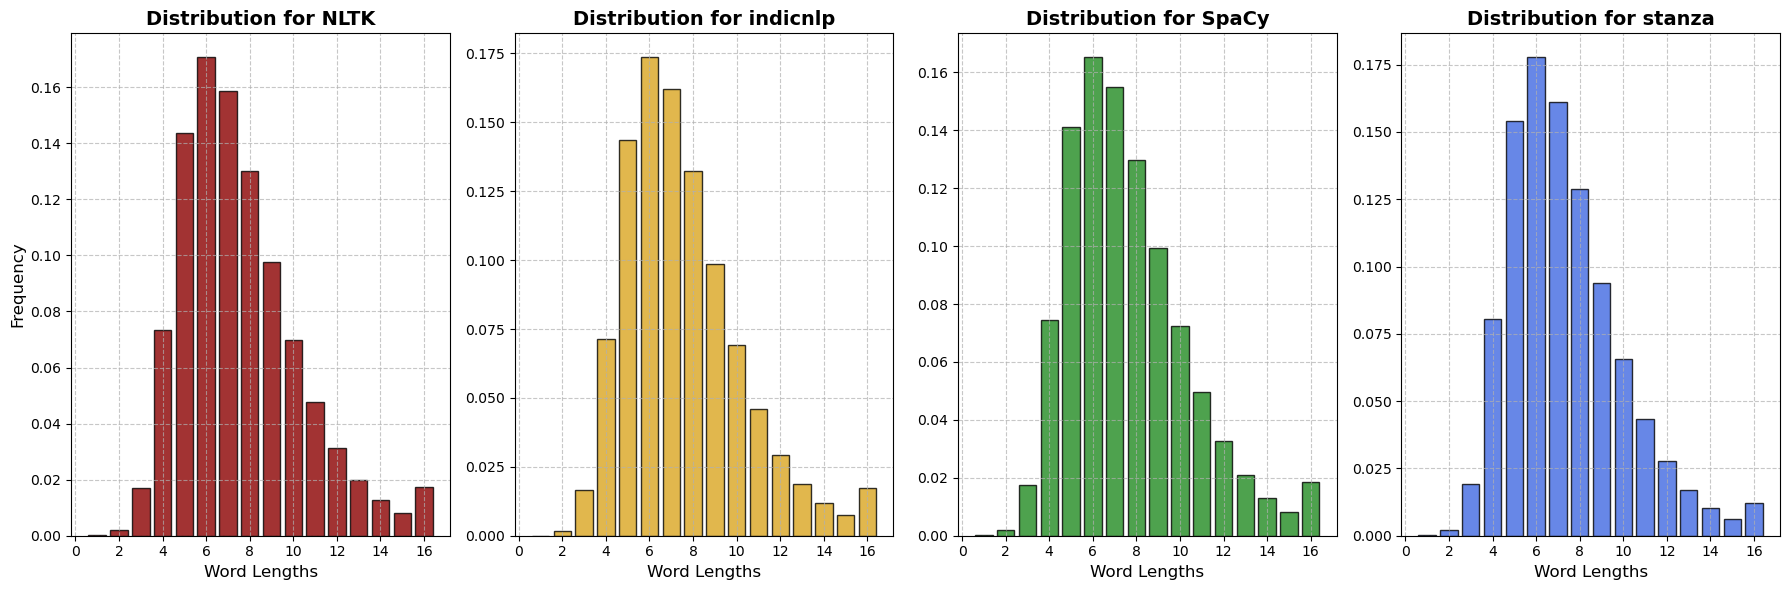

In [13]:
import matplotlib.pyplot as plt

# Ensure plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Create a figure with a size suitable for four subplots
plt.figure(figsize=(18, 6))

# Subplot for 'nltk'
plt.subplot(1, 4, 1)
plt.bar(df_1.index, df_1['nltk'], color='darkred', edgecolor='black', alpha=0.8)
plt.title('Distribution for NLTK', fontsize=14, fontweight='bold')
plt.xlabel('Word Lengths', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Subplot for 'indicnlp'
plt.subplot(1, 4, 2)
plt.bar(df_1.index, df_1['indicnlp'], color='goldenrod', edgecolor='black', alpha=0.8)
plt.title('Distribution for indicnlp', fontsize=14, fontweight='bold')
plt.xlabel('Word Lengths', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Subplot for 'spacy'
plt.subplot(1, 4, 3)
plt.bar(df_1.index, df_1['spacy'], color='forestgreen', edgecolor='black', alpha=0.8)
plt.title('Distribution for SpaCy', fontsize=14, fontweight='bold')
plt.xlabel('Word Lengths', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Subplot for 'spacy'
plt.subplot(1, 4, 4)
plt.bar(df_1.index, df_1['stanza'], color='royalblue', edgecolor='black', alpha=0.8)
plt.title('Distribution for stanza', fontsize=14, fontweight='bold')
plt.xlabel('Word Lengths', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


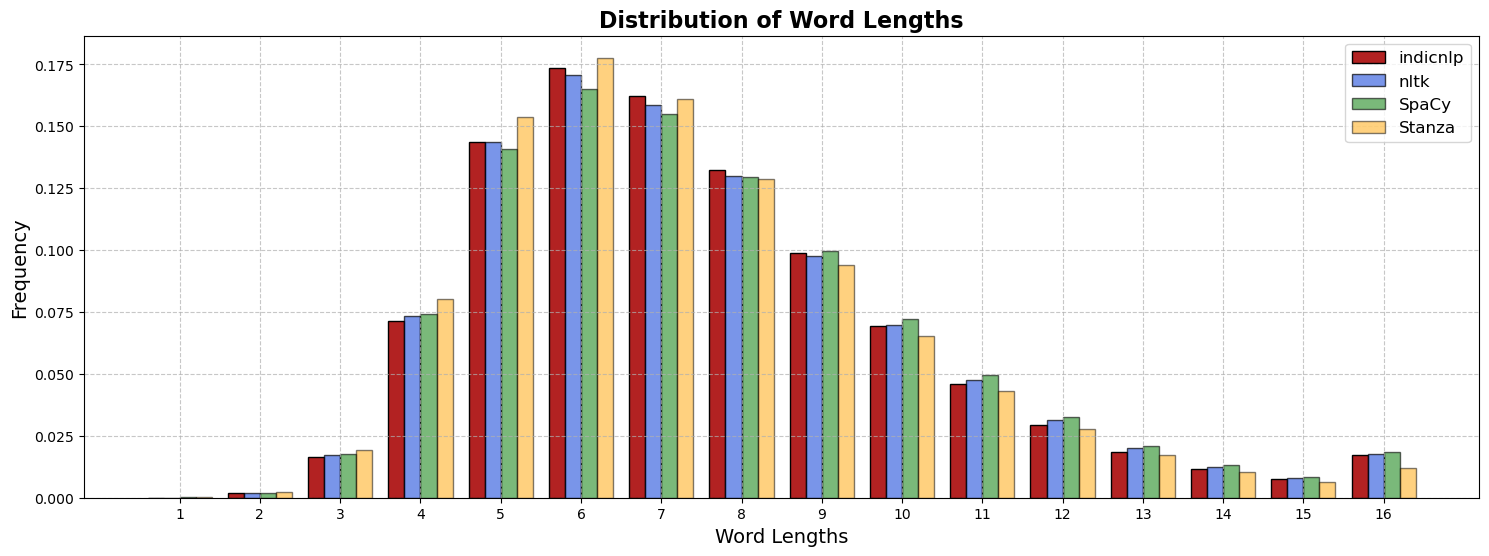

In [14]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.2  # Adjusted width to fit all bars
df_1.sort_index(inplace=True)
x = np.arange(len(df_1))

plt.figure(figsize=(18,6))

# Plot bars with different positions
plt.bar(x - 1.5*width, df_1['indicnlp'], color='firebrick', width=width, label='indicnlp', edgecolor='black')
plt.bar(x - 0.5*width, df_1['nltk'], color='royalblue', alpha=0.7, width=width, label='nltk', edgecolor='black')
plt.bar(x + 0.5*width, df_1['spacy'], color='forestgreen', alpha=0.6, width=width, label='SpaCy', edgecolor='black')
plt.bar(x + 1.5*width, df_1['stanza'], color='orange', alpha=0.5, width=width, label='Stanza', edgecolor='black')

# Add title and labels
plt.title('Distribution of Word Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Word Lengths', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve grid appearance
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Set x-ticks to the center of the grouped bars
plt.xticks(x, df_1.index)  # Ensure x-axis ticks are at the correct positions

plt.show()

### Analysing the ground truth files

In [52]:
import pandas as pd
from ur_utils import UrduTextCleaner

line_dict = {}
with open('outputs/ur/ground_truth/words.txt', 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()  # Remove leading and trailing whitespace
        
        # Clean the line using HindiTextCleaner
        cleaned_line = UrduTextCleaner(line).clean_data()
        
        # Update the dictionary with the cleaned line and its length
        line_dict[cleaned_line] = len(cleaned_line)

# Convert dictionary to DataFrame
ur_truth_df = pd.DataFrame(list(line_dict.items()), columns=['Word', 'lengths'])

In [53]:
ur_truth_df.to_csv('outputs/ur/ground_truth/urdu_ground_truth.csv', encoding='utf-8')

In [54]:
info_df(ur_truth_df)

max length, average length, min length: 22, 6, 1


In [55]:
freq_dict_truth = construct_freq_dicts(ur_truth_df, 15)
truth_probs = normalize_freq_dict(freq_dict_truth, ur_truth_df.shape[0])

Text(0.5, 0, 'Word lengths')

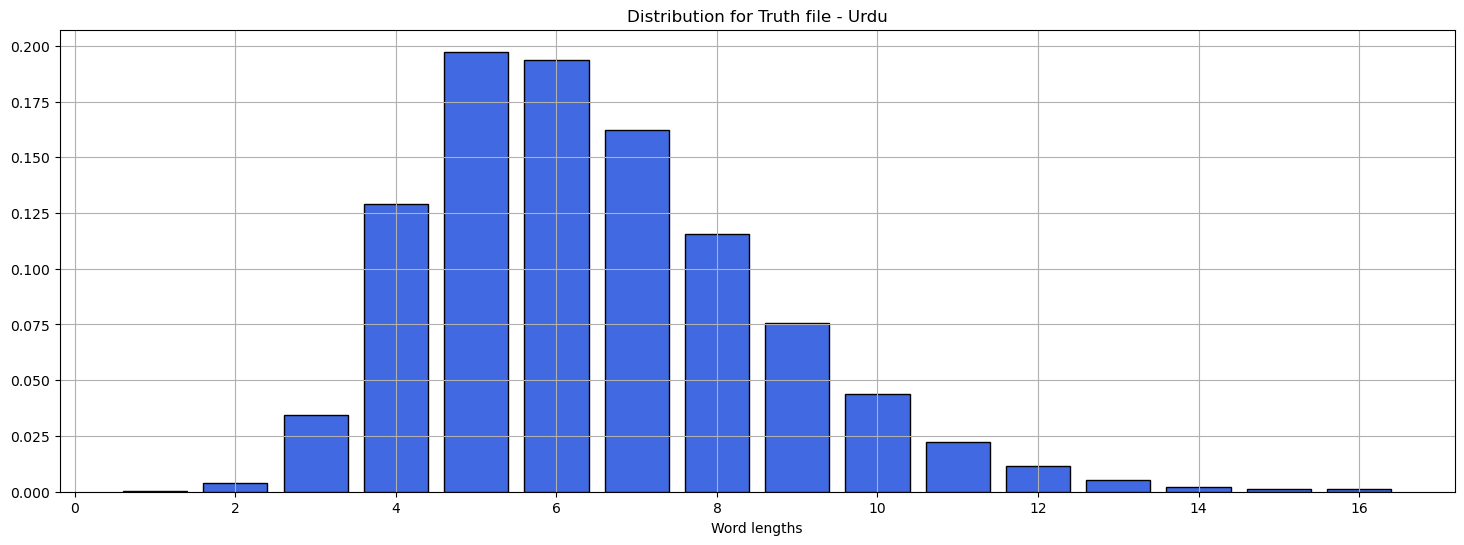

In [59]:
plt.figure(figsize=(18,6))

plt.bar(truth_probs.keys(), truth_probs.values(), color='royalblue', label='truth', edgecolor='black')
plt.title('Distribution for Truth file - Urdu')
plt.grid(True)
plt.xlabel('Word lengths')

### Quality check

In [15]:
import pandas as pd
from typing import List
from ur_utils import UrduTextCleaner

def check_missing_words(list_path: str = 'outputs/ur/ground_truth/words.txt') -> pd.DataFrame:    
    # List to hold all words from the file
    all_words_list: List[str] = []
    
    # Read all words from the file and store them in the list
    with open(list_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line:
                if len(line.split(' ')) == 1:
                    cleaned_word = UrduTextCleaner(line).clean_data()
                    all_words_list.append(cleaned_word)
        
    # Convert the list of all words to a set
    set_of_all_words = set(all_words_list)
    print(len(set_of_all_words))

check_missing_words()

/home/cair/miniconda3/envs/venv_dc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


151686


In [16]:
import pandas as pd
from typing import List
from ur_utils import UrduTextCleaner

def check_missing_words(df: pd.DataFrame, list_path: str = 'outputs/ur/ground_truth/words.txt') -> pd.DataFrame:
    
    # Convert the 'Word' column in the DataFrame to a set for efficient lookup
    set_of_words = set(df['Word'])
    
    # List to hold all words from the file
    all_words_list: List[str] = []
    
    # Read all words from the file and store them in the list
    with open(list_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
         
            line = UrduTextCleaner(line).clean_data()
            all_words_list.append(line)
        
    # Convert the list of all words to a set
    set_of_all_words = set(all_words_list)
    
    # Find missing words by checking which words in the set are not in the DataFrame's set
    missing_words: List[str] = [word for word in set_of_all_words if word not in set_of_words]
    
    # Calculate the hit ratio
    hit_ratio = (len(set_of_all_words) - len(missing_words)) / len(set_of_all_words)
    
    print(f'Total words in file: {len(set_of_all_words)}')
    print(f'Missing in DataFrame: {len(missing_words)}')
    print(f'Hit ratio: {hit_ratio:.2%}\n')
    
    # return missing_df

In [17]:
check_missing_words(ur_nltk_df)
check_missing_words(ur_spacy_df)
check_missing_words(ur_indic_df)
check_missing_words(ur_stanza_df)

Total words in file: 151686
Missing in DataFrame: 93585
Hit ratio: 38.30%

Total words in file: 151686
Missing in DataFrame: 93178
Hit ratio: 38.57%

Total words in file: 151686
Missing in DataFrame: 93585
Hit ratio: 38.30%

Total words in file: 151686
Missing in DataFrame: 93147
Hit ratio: 38.59%



## Chinese (Simplified)

In [6]:
import pandas as pd
zh_jieba_df = pd.read_csv('outputs/zh/rand/words_50L_rjieba.csv')
zh_spacy_df = pd.read_csv('outputs/zh/rand/words_50L_rspacy.csv')
zh_stanza_df = pd.read_csv('outputs/zh/rand/words_50L_rstanza.csv') 

In [7]:
print(zh_jieba_df.shape[0], zh_spacy_df.shape[0], zh_stanza_df.shape[0])

875312 1440220 1557246


### Checking the average, min and max length values

In [10]:
zh_jieba_df.sort_values('lengths', ascending=True, inplace=True)
zh_spacy_df.sort_values('lengths', ascending=True, inplace=True)
zh_stanza_df.sort_values('lengths', ascending=True, inplace=True)

def info_df(df: pd.DataFrame):
    # Ensure 'lengths' column is numeric
    df['lengths'] = pd.to_numeric(df['lengths'], errors='coerce')
    
    # Calculate statistics
    max_length = df['lengths'].max()
    min_length = df['lengths'].min()
    avg_length = df['lengths'].mean()
    
    # Sort DataFrame by 'lengths'
    df.sort_values('lengths', inplace=True, ascending=False)
    
    # Print results
    print(f'max length, average length, min length: {max_length}, {math.floor(avg_length)}, {min_length}')

print('jieba')
info_df(zh_jieba_df)

print('spacy')
info_df(zh_spacy_df)

print('stanza')
info_df(zh_stanza_df)

jieba
max length, average length, min length: 16, 2, 1
spacy
max length, average length, min length: 18, 2, 1
stanza
max length, average length, min length: 27, 2, 1


### Frequency Distribution 

In [13]:
zh_jieba = construct_freq_dicts(zh_jieba_df, 11)
zh_spacy = construct_freq_dicts(zh_spacy_df, 11)
zh_stanza = construct_freq_dicts(zh_stanza_df, 11)

zh_prob_jieba = normalize_freq_dict(zh_jieba, zh_jieba_df.shape[0])
zh_prob_spacy = normalize_freq_dict(zh_spacy, zh_spacy_df.shape[0])
zh_prob_stanza = normalize_freq_dict(zh_stanza, zh_stanza_df.shape[0])

In [14]:
tf_df = pd.DataFrame(index=zh_jieba.keys())

tf_df['jieba'] = zh_jieba.values()
tf_df['stanza'] = zh_stanza.values()
tf_df['spacy'] = zh_spacy.values()

In [15]:
tf_df.sort_index(inplace=True)
tf_df

,jieba,stanza,spacy
1,8358,8004,6882
2,457662,776488,703590
3,335871,539263,581674
4,66762,163017,107269
5,4027,50568,28170
6,1278,13920,8409
7,710,3970,2806
8,275,1307,980
9,159,428,262
10,107,160,93


In [16]:
df_1 = pd.DataFrame(index=zh_prob_jieba.keys())

df_1['jieba'] = zh_prob_jieba.values()
df_1['stanza'] = zh_prob_stanza.values()
df_1['spacy'] = zh_prob_spacy.values()

In [17]:
df_1.sort_index(inplace=True)
df_1

,jieba,stanza,spacy
1,0.009549,0.005140,0.004778
2,0.522856,0.498629,0.488530
3,0.383716,0.346293,0.403879
4,0.076272,0.104683,0.074481
5,0.004601,0.032473,0.019560
6,0.001460,0.008939,0.005839
7,0.000811,0.002549,0.001948
8,0.000314,0.000839,0.000680
9,0.000182,0.000275,0.000182
10,0.000122,0.000103,0.000065


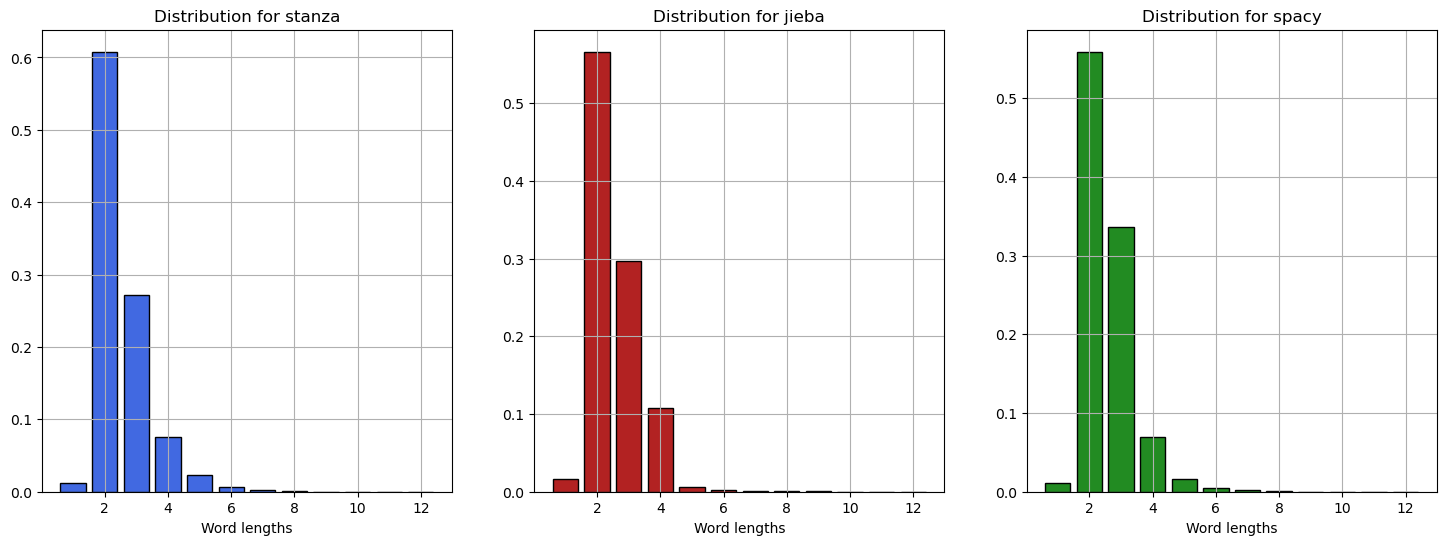

In [97]:
### BEFOREEEE

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_1.sort_index(inplace=True)
plt.figure(figsize=(18,6))

plt.subplot(1,3,2)
plt.bar(df_1.index, df_1['jieba'], color='firebrick', label='Jieba', edgecolor='black')
plt.title('Distribution for jieba')
plt.grid(True)
plt.xlabel('Word lengths')

plt.subplot(1,3,1)
plt.bar(df_1.index, df_1['stanza'], color='royalblue', label='Stanza', edgecolor='black')
plt.title('Distribution for stanza')
plt.grid(True)
plt.xlabel('Word lengths')

plt.subplot(1,3,3)
plt.bar(df_1.index, df_1['spacy'], color='forestgreen', label='SpaCy', edgecolor='black')
plt.title('Distribution for spacy')
plt.grid(True)
plt.xlabel('Word lengths')

plt.show()

### PLOT: Freq distributio of token lengths generated by each tokenizer on Chinese

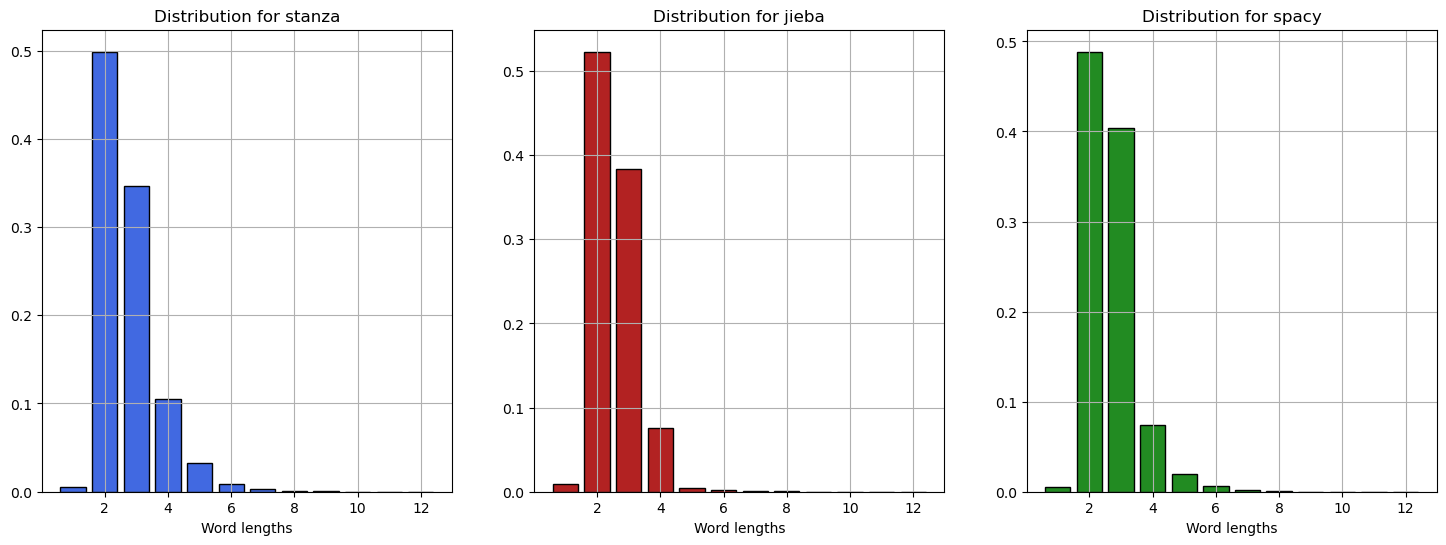

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_1.sort_index(inplace=True)
plt.figure(figsize=(18,6))

plt.subplot(1,3,2)
plt.bar(df_1.index, df_1['jieba'], color='firebrick', label='Jieba', edgecolor='black')
plt.title('Distribution for jieba')
plt.grid(True)
plt.xlabel('Word lengths')

plt.subplot(1,3,1)
plt.bar(df_1.index, df_1['stanza'], color='royalblue', label='Stanza', edgecolor='black')
plt.title('Distribution for stanza')
plt.grid(True)
plt.xlabel('Word lengths')

plt.subplot(1,3,3)
plt.bar(df_1.index, df_1['spacy'], color='forestgreen', label='SpaCy', edgecolor='black')
plt.title('Distribution for spacy')
plt.grid(True)
plt.xlabel('Word lengths')

plt.show()

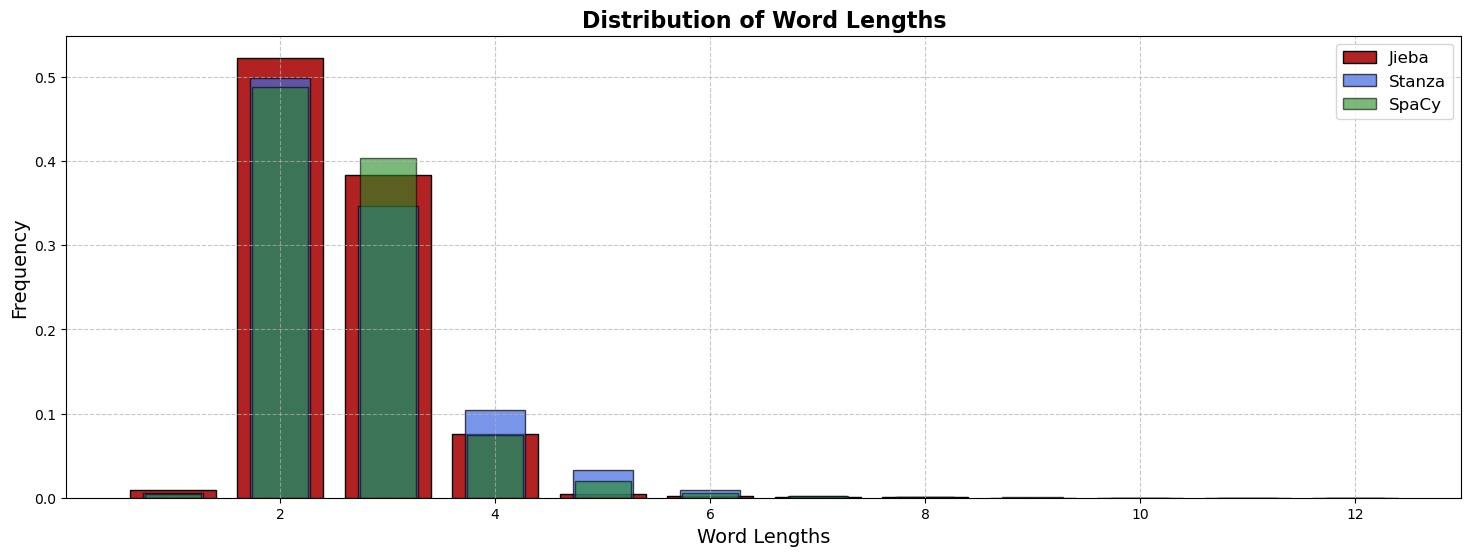

In [19]:
import matplotlib.pyplot as plt

width = 0.8

plt.figure(figsize=(18,6))

# Plot bars with different positions and colors
plt.bar(df_1.index, df_1['jieba'], color='firebrick', width=width, label='Jieba', edgecolor='black')
plt.bar(df_1.index, df_1['stanza'], color='royalblue', alpha=0.7, width=0.7*width, label='Stanza', edgecolor='black')
plt.bar(df_1.index, df_1['spacy'], color='forestgreen', alpha=0.6, width=0.65*width, label='SpaCy', edgecolor='black')

# Add title and labels
plt.title('Distribution of Word Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Word Lengths', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve grid appearance
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='upper right', fontsize=12)

plt.show()

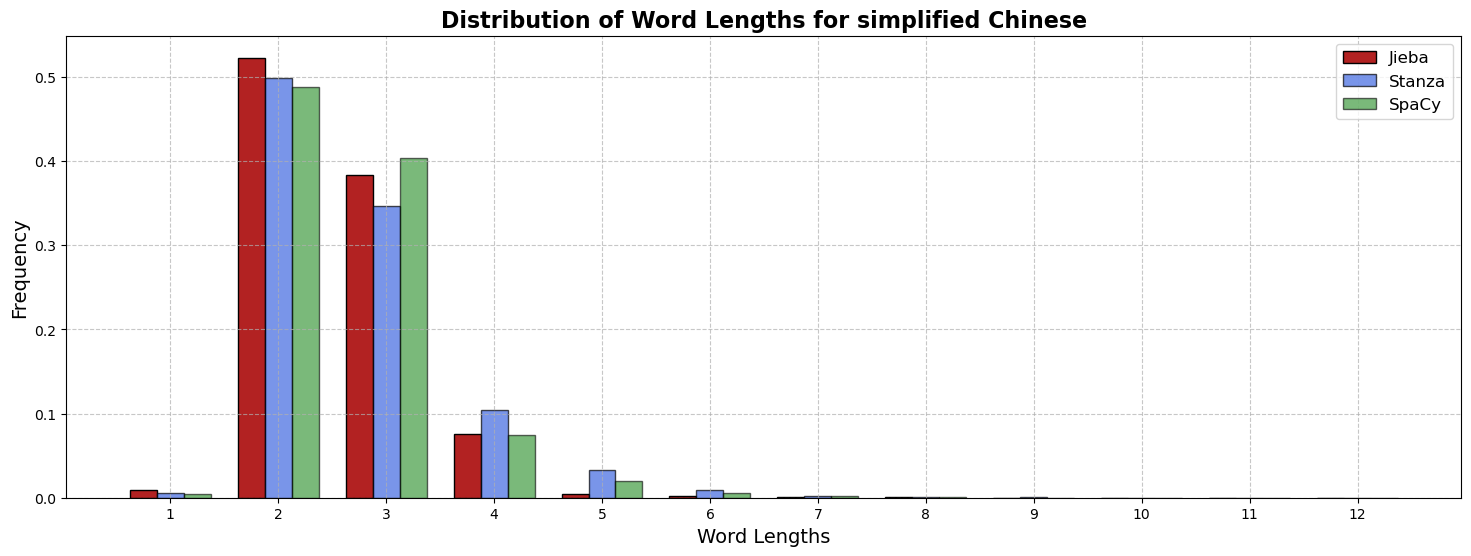

In [35]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.25
df_1.sort_index(inplace=True)
x = np.arange(len(df_1))

plt.figure(figsize=(18,6))

# Plot bars with different positions
plt.bar(x - width, df_1['jieba'], color='firebrick', width=width, label='Jieba', edgecolor='black')
plt.bar(x, df_1['stanza'], color='royalblue', alpha=0.7, width=width, label='Stanza', edgecolor='black')
plt.bar(x + width, df_1['spacy'], color='forestgreen', alpha=0.6, width=width, label='SpaCy', edgecolor='black')

# Add title and labels
plt.title('Distribution of Word Lengths for simplified Chinese', fontsize=16, fontweight='bold')
plt.xlabel('Word Lengths', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve grid appearance
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Set x-ticks to the center of the grouped bars
plt.xticks(x, df_1.index)  # Ensure x-axis ticks are at the correct positions

plt.show()

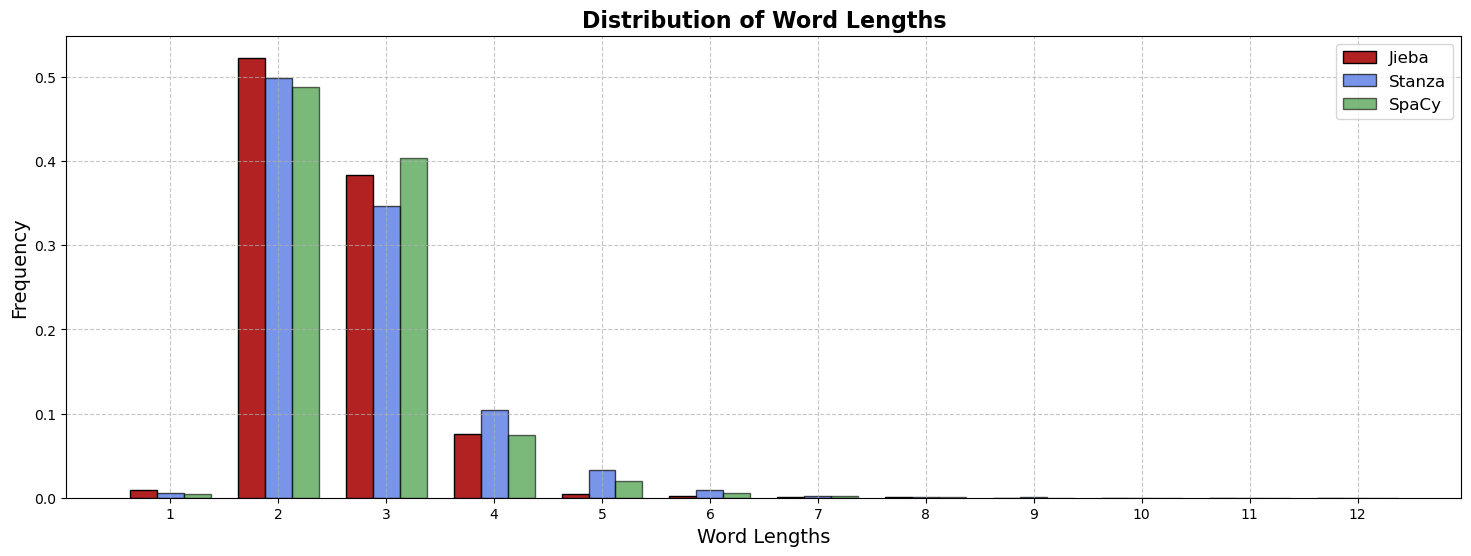

In [20]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.25
df_1.sort_index(inplace=True)
x = np.arange(len(df_1))

plt.figure(figsize=(18,6))

# Plot bars with different positions
plt.bar(x - width, df_1['jieba'], color='firebrick', width=width, label='Jieba', edgecolor='black')
plt.bar(x, df_1['stanza'], color='royalblue', alpha=0.7, width=width, label='Stanza', edgecolor='black')
plt.bar(x + width, df_1['spacy'], color='forestgreen', alpha=0.6, width=width, label='SpaCy', edgecolor='black')

# Add title and labels
plt.title('Distribution of Word Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Word Lengths', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve grid appearance
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Set x-ticks to the center of the grouped bars
plt.xticks(x, df_1.index)  # Ensure x-axis ticks are at the correct positions

plt.show()

### Analysing the ground truth file

In [44]:
import pandas as pd
from zh_utils import ChineseTextCleaner

line_dict = {}
with open('outputs/zh/ground_truth/cedict.txt', 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()  # Remove leading and trailing whitespace
        
        # Clean the line using HindiTextCleaner
        cleaned_line = ChineseTextCleaner(line).clean()
        
        # Update the dictionary with the cleaned line and its length
        line_dict[cleaned_line] = len(cleaned_line)

# Convert dictionary to DataFrame
zh_truth_df = pd.DataFrame(list(line_dict.items()), columns=['Word', 'lengths'])

In [46]:
zh_truth_df.to_csv('outputs/zh/ground_truth/zh_ground_truth.csv', encoding='utf-8')

In [47]:
info_df(zh_truth_df)

max length, average length, min length: 19, 2, 0


In [48]:
freq_dict_truth = construct_freq_dicts(zh_truth_df, 11)
truth_probs = normalize_freq_dict(freq_dict_truth, zh_truth_df.shape[0])

Text(0.5, 0, 'Word lengths')

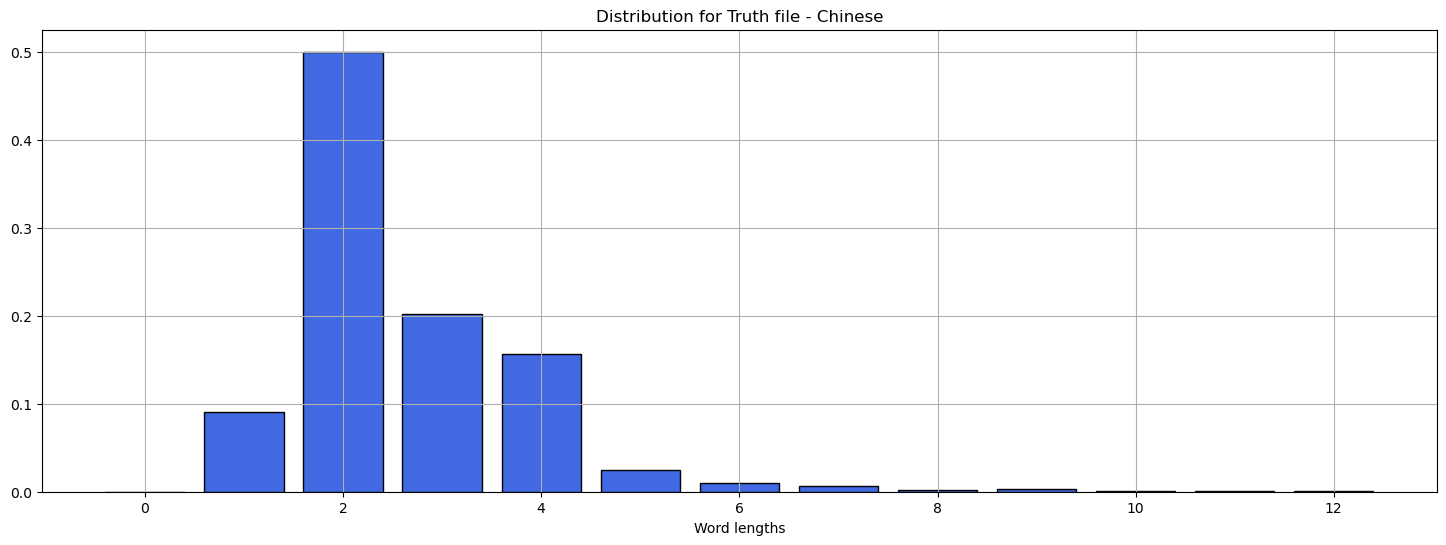

In [51]:
plt.figure(figsize=(18,6))

plt.bar(truth_probs.keys(), truth_probs.values(), color='royalblue', label='truth', edgecolor='black')
plt.title('Distribution for Truth file - Chinese')
plt.grid(True)
plt.xlabel('Word lengths')

### Quality Checks

In [27]:
import pandas as pd

def calculate_hit_ratios(truth_df: pd.DataFrame, jieba_df: pd.DataFrame, spacy_df: pd.DataFrame, stanza_df: pd.DataFrame):
    # Convert 'simplified' column from truth_df to a set
    truth_set = set(truth_df['simplified'].str.strip())

    # Initialize counters for missing words
    count, count1, count2, count3 = 0, 0, 0, 0

    # Convert 'Words' and 'Word' columns to sets for faster membership checking
    jieba_set = set(zh_jieba_df['Word'].str.strip())
    spacy_set = set(zh_spacy_df['Word'].str.strip())
    stanza_set = set(zh_stanza_df['Word'].str.strip())

    # Iterate through 'simplified' column in truth_df and count missing words
    for word in truth_set:
        if word not in jieba_set:
            count += 1

        if word not in spacy_set:
            count2 += 1

        if word not in stanza_set:
            count3 += 1

    # Calculate hit ratios
    hit_ratio_jieba = (len(truth_set) - count) / len(truth_set) if len(truth_set) > 0 else 0
    hit_ratio_spacy = (len(truth_set) - count2) / len(truth_set) if len(truth_set) > 0 else 0
    hit_ratio_stanza = (len(truth_set) - count3) / len(truth_set) if len(truth_set) > 0 else 0

    # Print the results
    print(f"Hit ratio for jieba_df: {hit_ratio_jieba:.2%}")
    print(f"Hit ratio for spacy_df: {hit_ratio_spacy:.2%}")
    print(f"Hit ratio for stanza_df: {hit_ratio_stanza:.2%}")

In [28]:
calculate_hit_ratios(truth_df=truth_df, jieba_df=zh_jieba_df, spacy_df=zh_spacy_df, stanza_df=zh_stanza_df)

Hit ratio for jieba_df: 69.77%
Hit ratio for spacy_df: 67.68%
Hit ratio for stanza_df: 58.40%


## Hindi

In [21]:
hi_indic_df = pd.read_csv('outputs/hi/rand/words_50L_rindic.csv', encoding='utf-8')
hi_spacy_df = pd.read_csv('outputs/hi/rand/words_50L_rspacy.csv', encoding='utf-8')
hi_stanza_df = pd.read_csv('outputs/hi/rand/words_50L_rstanza.csv', encoding='utf-8')

In [22]:
print(hi_indic_df.shape[0], hi_spacy_df.shape[0], hi_stanza_df.shape[0])

794003 794003 794281


In [23]:
hi_indic_df.sort_values('lengths', ascending=True, inplace=True)
hi_spacy_df.sort_values('lengths', ascending=True, inplace=True)
hi_stanza_df.sort_values('lengths', ascending=True, inplace=True)

def info_df(df: pd.DataFrame):
    # Ensure 'lengths' column is numeric
    df['lengths'] = pd.to_numeric(df['lengths'], errors='coerce')
    
    # Calculate statistics
    max_length = df['lengths'].max()
    min_length = df['lengths'].min()
    avg_length = df['lengths'].mean()
    
    # Sort DataFrame by 'lengths'
    df.sort_values('lengths', inplace=True, ascending=False)
    
    # Print results
    print(f'max length, average length, min length: {max_length}, {math.floor(avg_length)}, {min_length}')

print('indicnlp')
info_df(hi_indic_df)

print('spacy')
info_df(hi_spacy_df)

print('stanza')
info_df(hi_stanza_df)

indicnlp
max length, average length, min length: 195, 7, 1
spacy
max length, average length, min length: 195, 7, 1
stanza
max length, average length, min length: 195, 7, 1


In [24]:
## Getting the word frequencies for each length

spacy_hi = construct_freq_dicts(hi_spacy_df, 20)
indic_hi = construct_freq_dicts(hi_indic_df, 20)
stanza_hi = construct_freq_dicts(hi_stanza_df, 20)

# Normalizing them by dividing with the total number of words
spacy_hi_prob = normalize_freq_dict(spacy_hi, hi_spacy_df.shape[0])
indic_hi_prob = normalize_freq_dict(indic_hi, hi_indic_df.shape[0])
stanza_hi_prob = normalize_freq_dict(stanza_hi, hi_stanza_df.shape[0])

In [25]:
df_1 = pd.DataFrame(index=spacy_hi_prob.keys())

df_1['spacy'] = spacy_hi_prob.values()
df_1['stanza'] = stanza_hi_prob.values()
df_1['indicnlp'] = indic_hi_prob.values()

## PLOTS

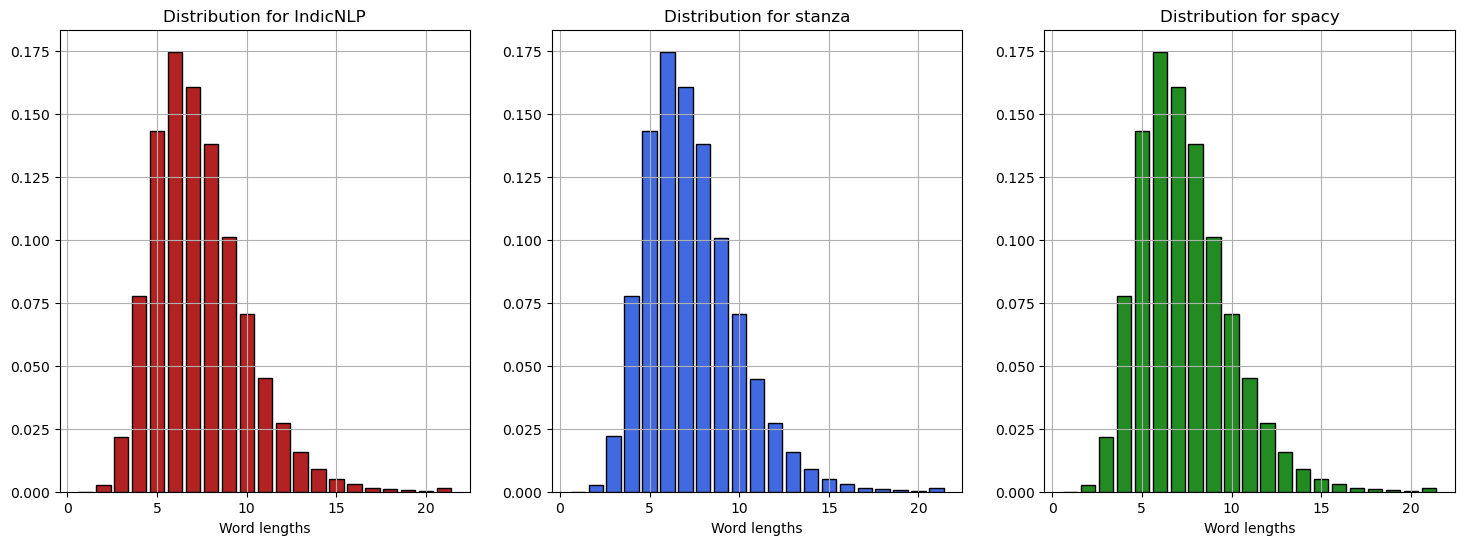

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_1.sort_index(inplace=True)
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.bar(df_1.index, df_1['indicnlp'], color='firebrick', label='indicnlp', edgecolor='black')
plt.title('Distribution for IndicNLP')
plt.grid(True)
plt.xlabel('Word lengths')

plt.subplot(1,3,2)
plt.bar(df_1.index, df_1['stanza'], color='royalblue', label='Stanza', edgecolor='black')
plt.title('Distribution for stanza')
plt.grid(True)
plt.xlabel('Word lengths')

plt.subplot(1,3,3)
plt.bar(df_1.index, df_1['spacy'], color='forestgreen', label='SpaCy', edgecolor='black')
plt.title('Distribution for spacy')
plt.grid(True)
plt.xlabel('Word lengths')

plt.show()

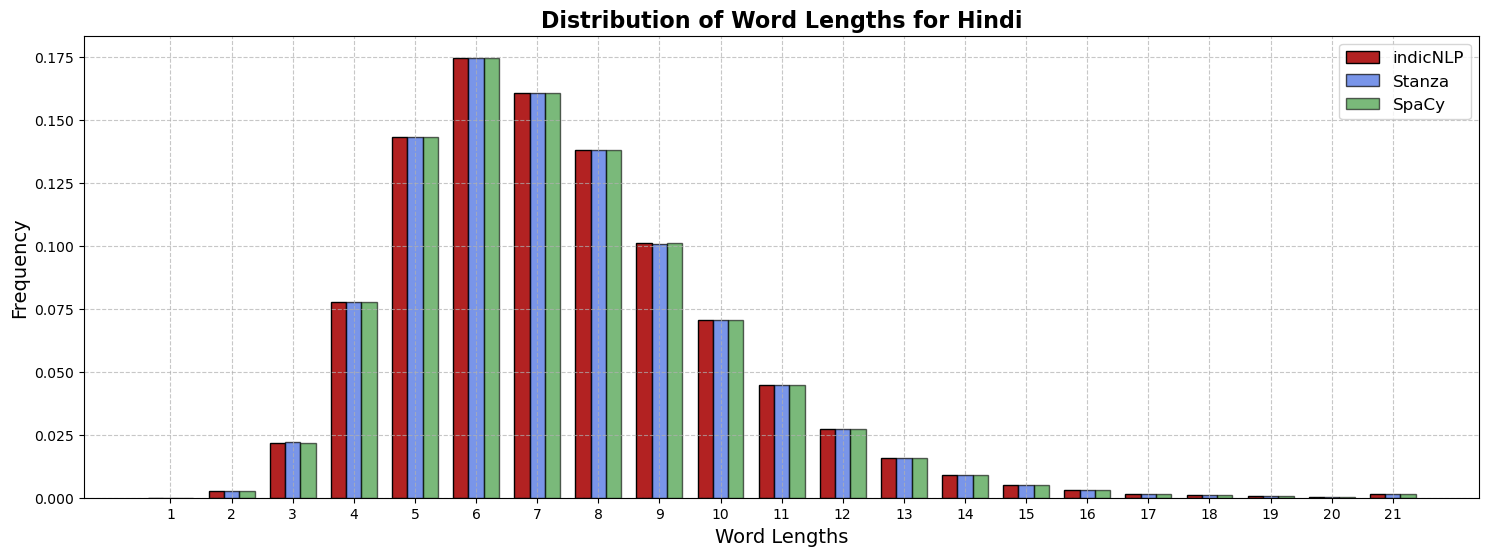

In [27]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.25
df_1.sort_index(inplace=True)
x = np.arange(len(df_1))

plt.figure(figsize=(18,6))

# Plot bars with different positions
plt.bar(x - width, df_1['indicnlp'], color='firebrick', width=width, label='indicNLP', edgecolor='black')
plt.bar(x, df_1['stanza'], color='royalblue', alpha=0.7, width=width, label='Stanza', edgecolor='black')
plt.bar(x + width, df_1['spacy'], color='forestgreen', alpha=0.6, width=width, label='SpaCy', edgecolor='black')

# Add title and labels
plt.title('Distribution of Word Lengths for Hindi', fontsize=16, fontweight='bold')
plt.xlabel('Word Lengths', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improve grid appearance
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Set x-ticks to the center of the grouped bars
plt.xticks(x, df_1.index)  # Ensure x-axis ticks are at the correct positions

plt.show()

### Analysing the ground truth file

In [36]:
import pandas as pd
from hi_utils import HindiTextCleaner

line_dict = {}
with open('outputs/hi/ground_truth/hindi.txt', 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()  # Remove leading and trailing whitespace
        
        # Clean the line using HindiTextCleaner
        cleaned_line = HindiTextCleaner(line).clean()
        
        # Update the dictionary with the cleaned line and its length
        line_dict[cleaned_line] = len(cleaned_line)

# Convert dictionary to DataFrame
truth_df = pd.DataFrame(list(line_dict.items()), columns=['Word', 'lengths'])

In [43]:
truth_df.to_csv('outputs/hi/ground_truth/hindi_truth.csv', encoding='utf-8')

In [37]:
info_df(truth_df)

max length, average length, min length: 37, 7, 0


In [38]:
freq_dict_truth = construct_freq_dicts(truth_df, 20)
truth_probs = normalize_freq_dict(freq_dict_truth, truth_df.shape[0])

Text(0.5, 0, 'Word lengths')

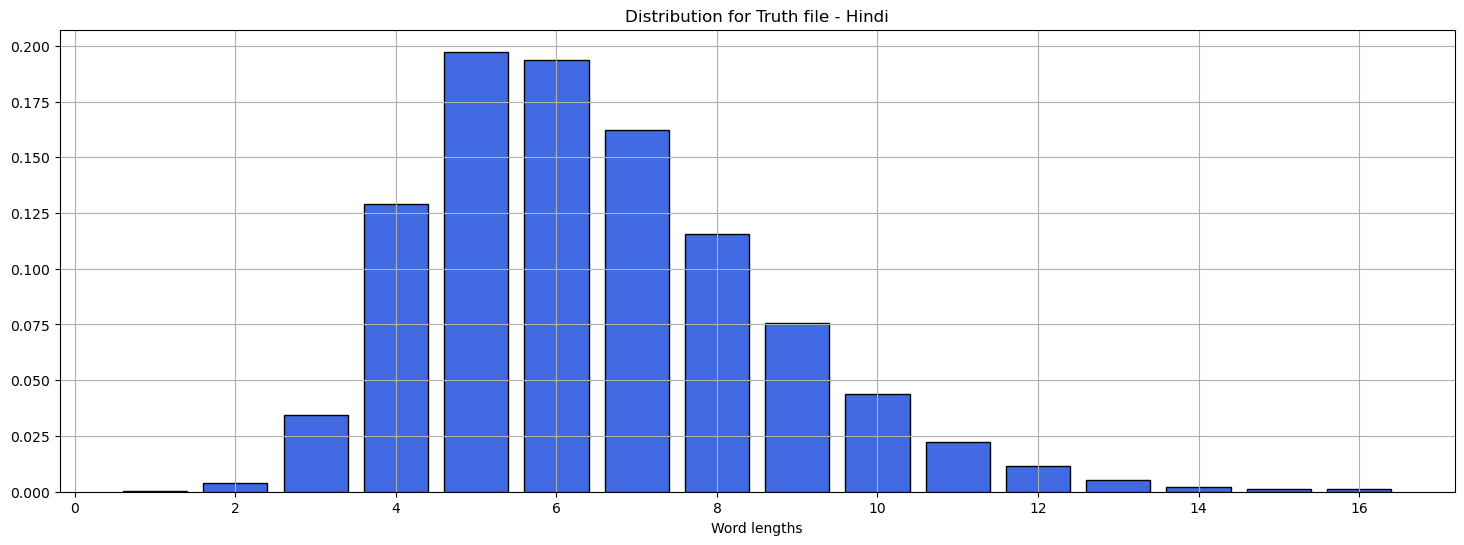

In [58]:
plt.figure(figsize=(18,6))

plt.bar(truth_probs.keys(), truth_probs.values(), color='royalblue', label='truth', edgecolor='black')
plt.title('Distribution for Truth file - Hindi')
plt.grid(True)
plt.xlabel('Word lengths')

### Quality check

In [28]:
import pandas as pd
from typing import List
from hi_utils import HindiTextCleaner

def check_missing_words(df: pd.DataFrame, list_path: str = 'outputs/hi/ground_truth/hindi.txt') -> pd.DataFrame:
    
    # Convert the 'Word' column in the DataFrame to a set for efficient lookup
    set_of_words = set(df['Word'])
    
    # List to hold all words from the file
    all_words_list: List[str] = []
    
    # Read all words from the file and store them in the list
    with open(list_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()

            line = HindiTextCleaner(line).clean()
            all_words_list.append(line)

    # Convert the list of all words to a set
    set_of_all_words = set(all_words_list)
    
    # Find missing words by checking which words in the set are not in the DataFrame's set
    missing_words: List[str] = [word for word in set_of_all_words if word not in set_of_words]
    
    # Calculate the hit ratio
    hit_ratio = (len(set_of_all_words) - len(missing_words)) / len(set_of_all_words)
    
    print(f'Total words in file: {len(set_of_all_words)}')
    print(f'Missing in DataFrame: {len(missing_words)}')
    print(f'Hit ratio: {hit_ratio:.2%}\n')
    
    # return missing_df

In [29]:
check_missing_words(hi_indic_df)
check_missing_words(hi_spacy_df)
check_missing_words(hi_stanza_df)

Total words in file: 207325
Missing in DataFrame: 130397
Hit ratio: 37.11%

Total words in file: 207325
Missing in DataFrame: 130397
Hit ratio: 37.11%

Total words in file: 207325
Missing in DataFrame: 130385
Hit ratio: 37.11%



## Experiments

In [68]:

# import warnings
# import csv
# import mmap
# from phonemizer.backend import EspeakBackend
# from phonemizer.separator import Separator
# import logging

# # Configure logging
# logging.basicConfig(
#     filename='logs/exp.log',
#     level=logging.INFO,
#     format='%(asctime)s - %(levelname)s - %(message)s'
# )

# # Suppress all warnings
# warnings.filterwarnings('ignore')

# dummy_file_txt = 'outputs/dummy/dummy_words_nltk.txt'
# dummy_file_csv = 'outputs/dummy/words_nltk.csv'

# backend = EspeakBackend('ur')

# # Open both files within a single context manager
# with open(dummy_file_txt, 'r', encoding='utf-8') as tfile, \
#      open(dummy_file_csv, 'r', encoding='utf-8') as cfile:
    
#     # Memory-map the text file
#     mfile = mmap.mmap(tfile.fileno(), 0, access=mmap.ACCESS_READ)
    
#     # Initialize CSV reader for the CSV file
#     reader = csv.reader(cfile)
#     mismatch_countw = 0
#     mismatch_count = 0
    
#     for line, row in zip(iter(mfile.readline, b""), reader):

#         word_txt = line.decode('utf-8').strip() 
#         word_csv = row[0].strip()

#         # Phonemize words from both sources
#         phoneme_txt = backend.phonemize([word_txt], separator=Separator(phone=' ', word=None), strip=True)[0]
#         phoneme_csv = backend.phonemize([word_csv], separator=Separator(phone=' ', word=None), strip=True)[0]
        
#         if abs(len(word_txt) - len(word_csv)) > 2:
#             mismatch_countw += 1

#         # Normalize and compare phonemic transcriptions
#         if abs(len(phoneme_txt.strip().split()) - len(phoneme_csv.strip().split())) > 2:
#             mismatch_count += 1
#             # logging.info(f'Comparison: {phoneme_txt} == {phoneme_csv}')

#     # Print number of mismatches found
#     print(f"Number of mismatches: {mismatch_count}, Number of mismatches: {mismatch_countw}")

# # Close the mmap file
# mfile.close()

In [ ]:
# from sklearn.metrics import classification_report

# def evaluate_tokenizer(predictions: List[str], ground_truth: List[str]) -> None:
#     report = classification_report(ground_truth, predictions, output_dict=True)
#     print(report)

# # Example usage
# predictions_tokenizer1 = ['tokenized_word1', 'tokenized_word2']
# ground_truth = ['reference_word1', 'reference_word2']
# evaluate_tokenizer(predictions_tokenizer1, ground_truth)

In [ ]:
# Some Key points - not very helpful if the tokenizers are different

# Number of segments: 5M

     # nltk's run time: 912.41 seconds, num_words: 1127583
     # spacy's run time: 806.40 seconds, num_words: 1042158
     # rule based run time: 1265.35 seconds, num_words: 917260 
     # stanza's runtime: roughly 4 hours, num_words: 942351

# Number of segments: 17M

     # nltk's run time: 2761.63 seconds, num words: 2163593
     # spacy's run time: 2394.15 seconds ,num_words: 2020555
     # rule based tokenizer's run time:  3360.74 seconds, num_words: 1810772

# Number of segments: 35M

     # nltk's run time: 7791.74 seconds, num words: 4048591 
     # spacy's run time: 6733.96 seconds,num_words: 3796418
     # rule based tokenizer's run time: 9774.59 seconds, num_words: 3266174